# Logistic Regression

In [1]:
import math
import numpy as np
from numpy import random
from matplotlib import cm 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from arftools import *
%matplotlib inline

## Construct a function structure

In [2]:
from collections import namedtuple 
Fonction = namedtuple ( "Fonction",["f","grad","dim"])   #declaration  de  la  structure
def f_id (x):return x                             #definition  de  l  afonction
def f_idgrad (x): return 1                       #definition  du  gradient
identite = Fonction ( f_id , f_idgrad ,1)           #construire  la  structure
identite.f(1),identite.grad(1),identite.dim #u t i l i s e r  la  structure
def v2m(x): 
    return x.reshape((1,x.size)) if len(x.shape)==1 else x

## Create a function 'optimize' which optimizes a continous function

In [3]:
def optimize(fonc,eps=1e-4,maxiter=100,xinit=None):
    if xinit == None:
        xinit= np.random.rand(100)
    x = xinit
    log_x    = np.array(x)
    log_f    = np.array(fonc.f(x))
    log_grad = np.array(fonc.grad(x))
    cpt = 0
    
    while cpt < maxiter :
        x = x-eps*fonc.grad(x)
        log_x = np.vstack((log_x,x))
        log_f = np.vstack((log_f,fonc.f(x)))
        log_grad = np.vstack((log_grad,fonc.grad(x)))
        cpt += 1 
    return (log_x, log_f, log_grad) 
      

## Logistic Regression Classification

### Sigmoid Function

In [4]:
def sigmoid(w,x):
    return 1./(1.+np.exp(x.dot(w)))

### Gradient of Sigmoid Function

In [5]:
def grad_sigmoid(w,x,y):
    return (sigmoid(w,x)-y).dot(x)

### Logistic Regression Classifier

In [7]:
class LogisticRegression(Classifier):
    def __init__(self,eps=1e-4,max_iter=5000,dim=2):
        self.dim = dim
        
    def fit(self,data,y):
        self.data = data
        self.y    = y
        self.fonc_logistique = Fonction (self.f_regression_logistique, self.f_regression_logistique_grad, 1)
        log_x, log_f, log_grad = optimize(self.fonc_logistique,xinit = np.array(random.random(self.dim)*(10)-5))      
        self.x = log_x[-1]
       
    def predict(self,testX):
        X = v2m(testX)
        return -np.sign(sigmoid(self.x,X) - 0.5)
    
    def f_regression_logistique(self,w):
        return sum(sigmoid(w,self.data))
    
    def f_regression_logistique_grad(self,w):
        return grad_sigmoid(w,self.data,self.y)

## Experiment

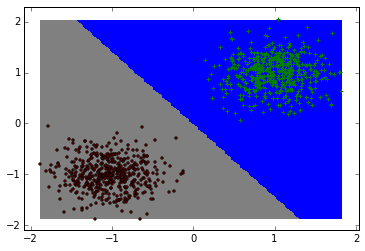

In [8]:
dataX,dataY = gen_arti()
testX ,testY  = gen_arti()

lr = LogisticRegression()
lr.fit(dataX,dataY)
plot_frontiere(testX,lr.predict,step=100)
plot_data(testX,testY)